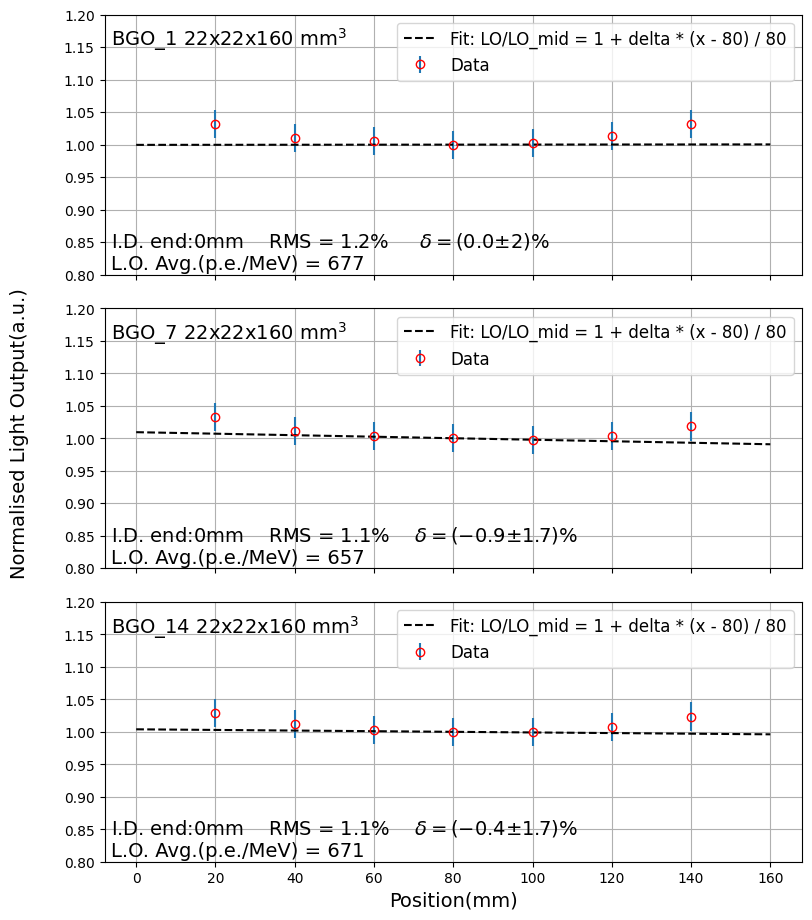

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given Data
position = np.array([20, 40, 60, 80, 100, 120, 140])
LO_1 = np.array([748, 740, 738, 736, 737, 741, 748])
LO_7 = np.array([738.4, 730.6, 727.8, 726.4, 725.3, 727.4, 733.1])
LO_14 = np.array([744.5, 738, 734.5, 733.6, 733.7, 736.3, 742.4])

LO_1_calib = (LO_1-358)/(0.511*1.107) # Substracting pedestal and dividing by claibration value for Gate =2000ns
LO_7_calib = (LO_7-358)/(0.511*1.107)
LO_14_calib = (LO_14-358)/(0.511*1.107)
#pedestal = np.array([25, 44, 52, 60, 127, 177, 207, 284, 358, 432, 505])
#Calibration = np.array([0.579, 0.637, 0.678, 0.734, 0.93, 1.011, 1.041 ,1.086, 1.107, 1.11, 1.113])
# Normalize the data at position 80
def normalize(data, x_mid, LO_mid):
    return data / LO_mid

LO_1_mid = LO_1_calib[position == 80][0]
LO_7_mid = LO_7_calib[position == 80][0]
LO_14_mid = LO_14_calib[position == 80][0]

LO_1_norm = normalize(LO_1_calib, 80, LO_1_mid)
LO_7_norm = normalize(LO_7_calib, 80, LO_7_mid)
LO_14_norm = normalize(LO_14_calib, 80, LO_14_mid)
sigma_LO_1 = (LO_1_calib*0.02+1)/LO_1_mid
sigma_LO_7 = (LO_7_calib*0.02+1)/LO_7_mid
sigma_LO_14 =(LO_14_calib*0.02+1)/LO_14_mid
# Fit function for LO/LO_mid
def fit_func(x, delta):
    return 1 + (delta * (x - 80) / 80)
position_fit = np.linspace(0,160,1600)
# Fit the normalized data for each dataset
popt_1, pcov_1 = curve_fit(fit_func, position, LO_1_norm, p0=[0.01], sigma = sigma_LO_1, absolute_sigma=True, maxfev = 10000)
popt_7, pcov_7 = curve_fit(fit_func, position, LO_7_norm, p0=[0.01], sigma= sigma_LO_7, absolute_sigma=True, maxfev = 10000)
popt_14, pcov_14 = curve_fit(fit_func, position, LO_14_norm, p0=[0.01], sigma= sigma_LO_14, absolute_sigma=True, maxfev = 10000)

# Calculate RMS values for each normalized dataset
def calculate_rms(data):
    return np.sqrt(np.mean((data - np.mean(data))**2))

rms_1 = calculate_rms(LO_1_norm)*100/np.mean(LO_1_norm)
rms_7 = calculate_rms(LO_7_norm)*100/np.mean(LO_7_norm)
rms_14 = calculate_rms(LO_14_norm)*100/np.mean(LO_14_norm)

# Create a 3x1 subplot
fig, axs = plt.subplots(3, 1, figsize=(9, 11), sharex=True, sharey=False)

# Plot data and fits for LO_1
axs[0].errorbar(position, LO_1_norm, yerr= sigma_LO_1, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
axs[0].plot(position_fit, fit_func(position_fit, *popt_1), color='black', linestyle='--', label=f'Fit: LO/LO_mid = 1 + delta * (x - 80) / 80')
axs[0].set_title('BGO_1 22x22x160 mm$^3$', loc='left', x=0.01, y=0.85, fontsize = 14)  # Top-left title
axs[0].text(0.01, 0.17, f'I.D. end:0mm    RMS = {rms_1:.1f}%     $\\delta = ({popt_1[0]*100:.1f} ± {np.sqrt(np.diag(pcov_1))[0]*100:.0f})$%\nL.O. Avg.(p.e./MeV) = {np.mean(LO_1_calib):.0f}', transform=axs[0].transAxes, fontsize=14, verticalalignment='top')
axs[0].legend(fontsize =12)
axs[0].grid(True)
axs[0].set_ylim(0.8, 1.2)

# Plot data and fits for LO_7
axs[1].errorbar(position, LO_7_norm, yerr= sigma_LO_7, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
axs[1].plot(position_fit, fit_func(position_fit, *popt_7), color='black',linestyle='--', label=f'Fit: LO/LO_mid = 1 + delta * (x - 80) / 80')
axs[1].set_title('BGO_7 22x22x160 mm$^3$', loc='left', x=0.01, y=0.85, fontsize = 14)  # Top-left title
axs[1].text(0.01, 0.17, f'I.D. end:0mm    RMS = {rms_7:.1f}%    $\\delta = ({popt_7[0]*100:.1f} ± {np.sqrt(np.diag(pcov_7))[0]*100:.1f})$%\nL.O. Avg.(p.e./MeV) = {np.mean(LO_7_calib):.0f}', transform=axs[1].transAxes, fontsize=14, verticalalignment='top')
#axs[1].text(0.05, 0.13, 'I.D. end:')
#axs[1].text(0.05, 0.13, f'RMS = {rms_7:.3f}%\n$\\delta = {popt_7[0]:.3f}$\pm$ {pcov_1[0]:.3f}   \textcolor{red}{{L.O. Avg. = np.mean(LO_1)}}$', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')
axs[1].legend(fontsize = 12)
axs[1].grid(True)
axs[1].set_ylim(0.8,1.2)

# Plot data and fits for LO_14
axs[2].errorbar(position, LO_14_norm, yerr= sigma_LO_14, fmt='o', markerfacecolor='none', markeredgecolor='red', label='Data')
axs[2].plot(position_fit, fit_func(position_fit, *popt_14), color='black',linestyle='--', label=f'Fit: LO/LO_mid = 1 + delta * (x - 80) / 80')
axs[2].set_title('BGO_14 22x22x160 mm$^3$', loc='left', x=0.01, y=0.85, fontsize = 14)  # Top-left title
axs[2].text(0.01, 0.17, f'I.D. end:0mm    RMS = {rms_14:.1f}%    $\\delta = ({popt_14[0]*100:.1f} ± {np.sqrt(np.diag(pcov_14))[0]*100:.1f})$%\nL.O. Avg.(p.e./MeV) = {np.mean(LO_14_calib):.0f}', transform=axs[2].transAxes, fontsize=14, verticalalignment='top')
axs[2].set_xlabel("Position (mm)")
axs[2].legend(fontsize = 12)
axs[2].grid(True)
axs[2].set_ylim(0.8, 1.2)

# Set common title for all subplots
#fig.suptitle('Light Yield Uniformity', fontsize=16)

fig.supylabel("Normalised Light Output(a.u.)", fontsize = 14)
#plt.ylabel("Normalised Light Output(a.u.)" , fontsize = 14, verticalalignment='center' )
plt.xlabel("Position(mm)", fontsize = 14)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.13)  # Set distance between subplots to zero

# Show the plot
plt.show()


In [3]:
print(LO_14_calib)

[683.25210323 671.7614469  665.57417042 663.98315647 664.15993579
 668.75619833 679.53973734]
